# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Read .csv file using python library

In [2]:
H1B_visa = pd.read_csv('C:\my files\Machine_learning_internship\Main_project\H-1B_Disclosure_Data_FY2019.csv',low_memory=False)

Check the no.of rows and columns in the csv file

In [3]:
H1B_visa.shape

(664616, 260)

Print the data using display option Onother hand, use .head for first five set or .tail for last five set of matrix data

In [4]:
H1B_visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,04/08/2016,04/30/2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,07/14/2017,05/13/2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,08/23/2017,04/30/2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,12/22/2017,08/20/2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,01/10/2018,04/15/2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

In VISA_CLASS, First condition has focusing H1B Visa for united states of America.
So, here drop the rows which is not belongs to H1B visa.
The following command excute  and keep necessary rows.

In [5]:
H1B_visa = H1B_visa[H1B_visa.VISA_CLASS == 'H-1B']
H1B_visa = H1B_visa[H1B_visa.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']


In [6]:
H1B_visa.shape

(621467, 260)

Now considering recommended features for the further EDA assessment arranging useful columns from the above conditioned data.

In [7]:
select_columns = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']
H1B_visa = H1B_visa[select_columns]

In [8]:
H1B_visa.shape

(621467, 21)

In [9]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
6,WITHDRAWN,H-1B,MH SUB I LLC,Y,NaN,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,0,...,0.0,0,0,N,NaN,N,100000.0,Year,1.0,97365.0
7,WITHDRAWN,H-1B,"KIIP, INC.",Y,N,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,1,...,0.0,0,0,N,NaN,N,131685.0,Year,1.0,131685.0
8,WITHDRAWN,H-1B,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",Y,N,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,1,...,0.0,0,0,N,NaN,N,99750.0,Year,1.0,97365.0
9,WITHDRAWN,H-1B,"SOLAREDGE TECHNOLOGIES, INC.",Y,N,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,0,...,0.0,0,0,N,NaN,N,130000.0,Year,1.0,126901.0
10,WITHDRAWN,H-1B,SOULSIGHT,Y,N,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,0,...,0.0,0,0,N,NaN,N,50000.0,Year,1.0,47549.0


In [10]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621467 entries, 6 to 664615
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  621467 non-null  object 
 1   VISA_CLASS                   621467 non-null  object 
 2   EMPLOYER_NAME                621461 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  621461 non-null  object 
 4   SECONDARY_ENTITY_1           568349 non-null  object 
 5   JOB_TITLE                    621466 non-null  object 
 6   SOC_TITLE                    621463 non-null  object 
 7   SOC_CODE                     621463 non-null  object 
 8   NAICS_CODE                   621466 non-null  float64
 9   CONTINUED_EMPLOYMENT         621467 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   621467 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    621466 non-null  float64
 12  CHANGE_EMPLOYER              621467 non-null  int64  
 13 

# Data visualisation

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

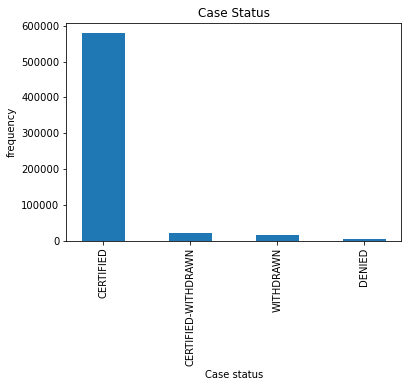

In [11]:
H1B_visa.CASE_STATUS.value_counts()
plt.bar(H1B_visa['CASE_STATUS'].value_counts().index, H1B_visa['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='JOB_TITLE'>

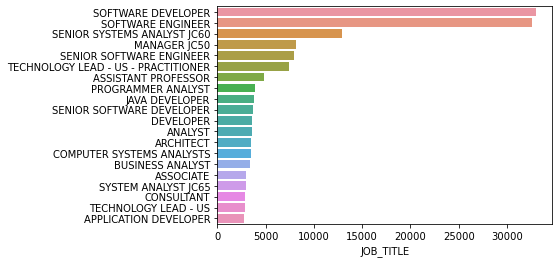

In [12]:
H1B_visa['JOB_TITLE'].value_counts()[:20]
sns.barplot(x = H1B_visa['JOB_TITLE'].value_counts()[:20], y = H1B_visa['JOB_TITLE'].value_counts().index[:20])

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

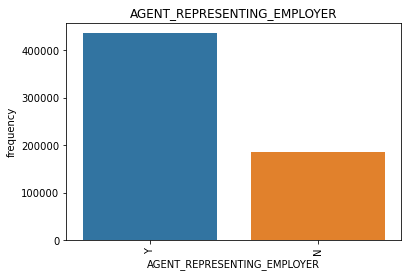

In [13]:
H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='EMPLOYER_NAME'>

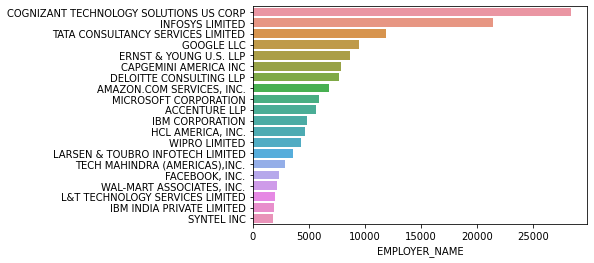

In [14]:
H1B_visa['EMPLOYER_NAME'].value_counts()
sns.barplot(x = H1B_visa['EMPLOYER_NAME'].value_counts()[:20], y = H1B_visa['EMPLOYER_NAME'].value_counts().index[:20])

In [15]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       6
AGENT_REPRESENTING_EMPLOYER         6
SECONDARY_ENTITY_1              53118
JOB_TITLE                           1
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     22
SUPPORT_H1B                    390907
WILLFUL_VIOLATOR                   22
WAGE_RATE_OF_PAY_FROM_1             7
WAGE_UNIT_OF_PAY_1                  7
TOTAL_WORKER_POSITIONS              2
PREVAILING_WAGE_1                4894
dtype: int64

In [16]:
H1B_visa =H1B_visa.dropna(subset = ['EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_TITLE','SOC_CODE','NAICS_CODE','NEW_CONCURRENT_EMPLOYMENT','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1','WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS'])


In [17]:
H1B_visa.describe()

,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,WAGE_RATE_OF_PAY_FROM_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
count,621420.000000,621420.000000,621420.000000,621420.000000,621420.000000,6.214200e+05,621420.000000,616533.000000
mean,450875.295811,0.120962,0.013912,0.268405,0.232262,9.362079e+04,1.641109,84143.158750
std,189718.169157,0.931050,0.291984,1.142731,0.920577,4.642478e+04,4.562708,35481.152597
min,31.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+00,1.000000,7.250000
25%,454111.000000,0.000000,0.000000,0.000000,0.000000,7.362500e+04,1.000000,68806.000000
50%,541511.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+04,1.000000,84240.000000
75%,541512.000000,0.000000,0.000000,0.000000,0.000000,1.133180e+05,1.000000,102181.000000
max,928120.000000,338.000000,99.000000,99.000000,99.000000,3.300000e+06,594.000000,849680.000000


<AxesSubplot:>

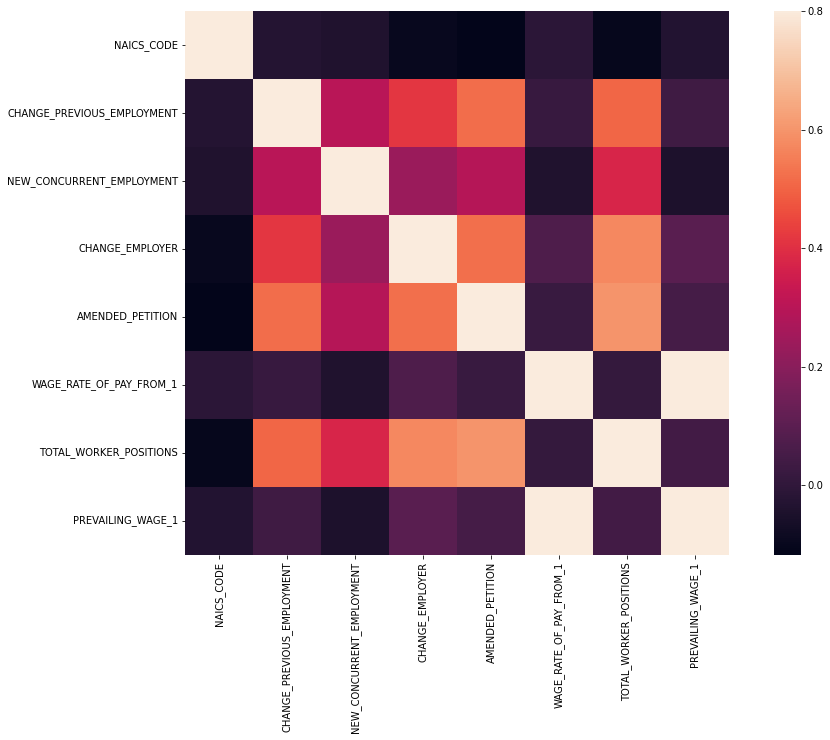

In [18]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=0.8,square=True)

In [19]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       0
AGENT_REPRESENTING_EMPLOYER         0
SECONDARY_ENTITY_1              53108
JOB_TITLE                           0
SOC_TITLE                           0
SOC_CODE                            0
NAICS_CODE                          0
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           0
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                      0
SUPPORT_H1B                    390871
WILLFUL_VIOLATOR                    0
WAGE_RATE_OF_PAY_FROM_1             0
WAGE_UNIT_OF_PAY_1                  0
TOTAL_WORKER_POSITIONS              0
PREVAILING_WAGE_1                4887
dtype: int64

In [20]:
H1B_visa.shape

(621420, 21)

In [21]:
H1B_visa.SUPPORT_H1B.value_counts()

Y    228658
N      1891
Name: SUPPORT_H1B, dtype: int64

In [22]:
H1B_visa.SECONDARY_ENTITY_1.value_counts()


N    343543
Y    224769
Name: SECONDARY_ENTITY_1, dtype: int64

In [23]:
H1B_visa.PREVAILING_WAGE_1.value_counts()

109242.0    8251
96366.0     7601
93538.0     5426
113318.0    5191
84240.0     3979
            ... 
121191.0       1
92975.0        1
159723.0       1
96245.0        1
109820.0       1
Name: PREVAILING_WAGE_1, Length: 25059, dtype: int64

In [24]:
mode1 = H1B_visa['SUPPORT_H1B'].mode().values[0]
mode2 = H1B_visa['SECONDARY_ENTITY_1'].mode().values[0]

H1B_visa['SUPPORT_H1B'] = H1B_visa['SUPPORT_H1B'].replace(np.nan,mode1)
H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].replace(np.nan,mode2)

In [25]:
H1B_visa = H1B_visa.drop(H1B_visa.loc[H1B_visa['PREVAILING_WAGE_1'].isnull()].index)

In [26]:
H1B_visa.isnull().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
AGENT_REPRESENTING_EMPLOYER    0
SECONDARY_ENTITY_1             0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

In [27]:
duplicate =H1B_visa.duplicated()
print(duplicate.sum())
H1B_visa[duplicate]

132230


,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
139,CERTIFIED,H-1B,INDUSTRY CREATIVE LLC,Y,N,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,0,...,0.0,0,0,N,Y,N,90000.00,Year,1.0,75046.00
166,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,N,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0.0,0,0,N,Y,N,102000.00,Year,1.0,94806.00
173,CERTIFIED,H-1B,SUNGWON ANNANDALE LLC,Y,N,MARKETING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,445110.0,0,...,0.0,0,0,N,Y,N,46.00,Hour,1.0,45.24
196,CERTIFIED,H-1B,FACEBOOK INC.,Y,N,"CREATIVE DIRECTOR, INSTAGRAM",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,...,0.0,0,0,Y,Y,N,178746.72,Year,1.0,158766.00
207,CERTIFIED,H-1B,ENERGY BBDO INC.,Y,N,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,...,0.0,0,0,N,Y,N,48000.00,Year,1.0,47549.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664363,CERTIFIED,H-1B,NUTRA-MED PACKAGING INC,Y,N,QUALITY ASSURANCE SUPERVISOR,FIRST-LINE SUPERVISORS OF PRODUCTION AND OPERA...,51-1011,561910.0,1,...,0.0,0,0,N,Y,N,73000.00,Year,1.0,72134.00
664584,CERTIFIED,H-1B,"MARLIN ENGINEERING, INC.",Y,N,TRAFFIC ENGINEER,TRAFFIC TECHNICIANS,53-6041,541330.0,0,...,0.0,0,0,N,Y,N,63000.00,Year,1.0,42515.00
664599,CERTIFIED,H-1B,"EVEREST CONSULTANTS, INC.",Y,N,MARINE CONSULTANT SURVEYOR,TRANSPORTATION INSPECTORS,53-6051,541690.0,0,...,0.0,0,0,N,Y,N,31866.00,Year,1.0,31866.00
664603,CERTIFIED,H-1B,AMSPEC LLC,Y,N,PETROLEUM INSPECTOR,TRANSPORTATION INSPECTORS,53-6051,541380.0,1,...,0.0,0,0,N,Y,N,75000.00,Year,1.0,58011.00


In [28]:
H1B_visa.drop_duplicates(inplace=True)

In [29]:
dpl = H1B_visa.duplicated()
dpl.sum()

0

<AxesSubplot:>

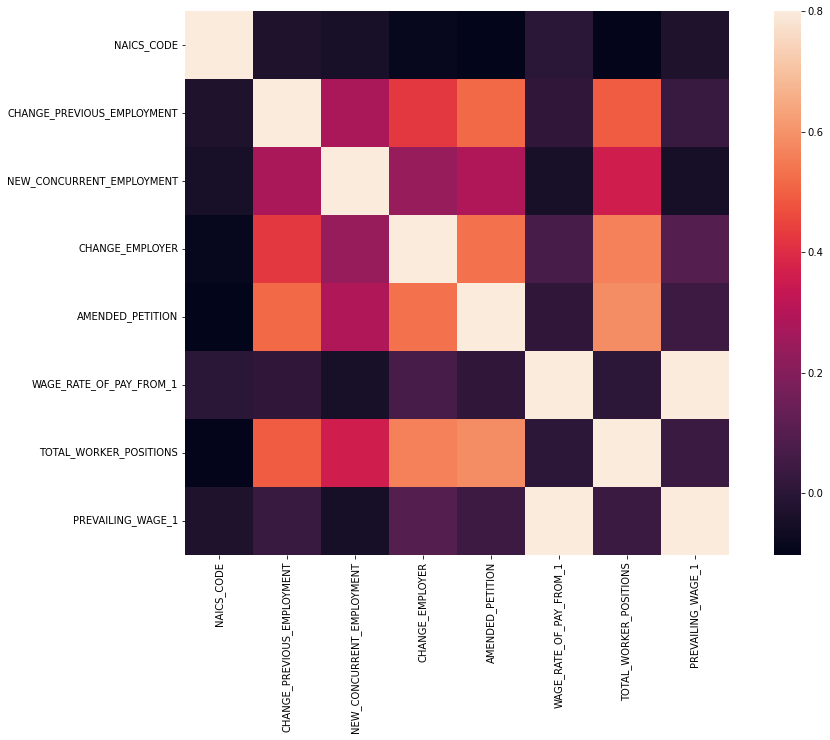

In [30]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=0.8,square=True)

In [31]:
H1B_visa.EMPLOYER_NAME.value_counts()
print('EMPLOYER_NAME:\n',H1B_visa.EMPLOYER_NAME.value_counts()[300:350])

EMPLOYER_NAME:
 MANAGEMENT HEALTH SYSTEMS, LLC                153
FIDELITY BROKERAGE SERVICES LLC               153
REVEREIT LLC                                  153
SQUARE, INC.                                  152
APPLAB SYSTEMS, INC                           152
ETOUCH SYSTEMS CORPORATION                    152
TANISHA SYSTEMS INC                           151
BRIGHAM AND WOMEN'S HOSPITAL                  150
ILLUMINA, INC.                                150
MEMORIAL SLOAN-KETTERING CANCER CENTER        150
THE JOHNS HOPKINS UNIVERSITY                  150
ADECCO GROUP NA/MODIS, INC.                   150
ZENSAR TECHNOLOGIES, INC.                     149
CATERPILLAR INC.                              149
SAPPHIRE SOFTWARE SOLUTIONS INC               149
ADS ALLIANCE DATA SYSTEMS, INC.               149
CONSULTADD INC                                149
MASSACHUSETTS INSTITUTE OF TECHNOLOGY         148
BIRLASOFT SOLUTIONS, INC.                     148
NAGARRO INC.                      

In [32]:
import sys
H1B_visa['EMPLOYER_BRANCH'] = 'others'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('APPLE|GOOGLE|FACEBOOK|CAPGEMINI|WIPRO|TWITTER|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA')] = 'TOP TECH'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC')] = 'ELECTRONIC & LOGISTICS SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('UNIVERSITY|UNIVERSITIES|ACADEMIC|INSTITUTIONS|SCIENCE|NATIONAL|SCHOOL')] = 'UNIVERSITY'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('MASTER|BANK|CARD|VISA')] = 'BANKING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('HEALTH|FIN|ECLINICALWORKS|MEDTRONIC|FINANCIAL|MEDICAL|MED|CENTER')] = 'FINANCE AND MEDICAL SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('BUSINESS|MANAGEMENT')] = 'BUSINESS SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('LABS|COMMUNICATION|NETWORK|DIGITAL|NETWORKS')] = 'RESEARCH LABS & NETWORK'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('AUTOBILE|AUTOMOTIVE|MOTOR|AUTO|FORD|PUMP|ELECTRIC|TESLA|BOSCH')] = 'AUTOMOTIVE & ELECTRICAL'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DEVELOPMENT|IT|COMPUTER|CYBER|TECHNOLOGY|TECH|SOLUTIONS|WEB|INFOTECH|CLOUD|VISION|GLOBAL|SYSTEMS|TECHNOSOFT|TECHNO|SERVICES|SECURITIES|SECURITY|TECHNOLOGIES|DATA')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INTERNATIONAL|CONSULTING|CONSULTANT|RESOURCES|GROUP|ASSOCIATES|ANALYSTS')] = 'CONSULTING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PRODUCT|PRODUCTS|ENTERPRISE|ENTERPRISES')] = 'PRODUCT &ENTERPRISE COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('')] = 'PRODUCT &ENTERPRISE COMPANIES'

C:\Users\User\AppData\Local\Temp\ipykernel_13124\1785688180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('APPLE|GOOGLE|FACEBOOK|CAPGEMINI|WIPRO|TWITTER|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA')] = 'TOP TECH'
C:\Users\User\AppData\Local\Temp\ipykernel_13124\1785688180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC')] = 'ELECTRONIC & LOGISTI

In [33]:
H1B_visa['EMPLOYER_BRANCH'].value_counts()

TECH SOLUTIONS                     195823
others                             171127
CONSULTING COMPANIES                43764
TOP TECH                            28384
FINANCE AND MEDICAL SOLUTIONS       11658
ELECTRONIC & LOGISTICS SERVICES      8702
RESEARCH LABS & NETWORK              5598
AUTOMOTIVE & ELECTRICAL              4836
BANKING COMPANIES                    4007
PRODUCT &ENTERPRISE COMPANIES        3785
UNIVERSITY                           3445
BUSINESS SOLUTIONS                   3174
Name: EMPLOYER_BRANCH, dtype: int64

In [34]:
H1B_visa.SOC_TITLE.value_counts()[:70]
print('SOC_TITLE:\n',H1B_visa.SOC_TITLE.value_counts()[:50])

SOC_TITLE:
 SOFTWARE DEVELOPERS, APPLICATIONS                     161626
COMPUTER OCCUPATIONS, ALL OTHER                        43558
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  25947
COMPUTER SYSTEMS ANALYSTS                              23026
MECHANICAL ENGINEERS                                   10084
OPERATIONS RESEARCH ANALYSTS                            9682
COMPUTER PROGRAMMERS                                    9120
COMPUTER SYSTEMS ANALYST                                8950
ACCOUNTANTS AND AUDITORS                                8502
COMPUTER AND INFORMATION SYSTEMS MANAGERS               8106
STATISTICIANS                                           7938
MANAGEMENT ANALYSTS                                     7853
DATABASE ADMINISTRATORS                                 7591
FINANCIAL ANALYSTS                                      7286
ELECTRICAL ENGINEERS                                    7118
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS             5570
ELECTRONICS 

In [35]:
import sys
H1B_visa['SOC_TITLE_NEW'] = 'others'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY')] = 'IT ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('MECHANICAL|DESIGN')] = 'MECHANICAL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('CHIEF|EXECUTIVES')] = 'Executives'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Chief|MANAGEMENT|MANAGERS')] = 'Manager'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('CHEMICAL|MARINE|INDUSTRIAL|MATERIALS')] = 'MULTIDISCPLINARY ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DATA|Database|STATISTICIANS')] = 'Database & Scientists'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Sales|Market')] = 'Sales & Market'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('FINANCIAL|ECONOMISTS')] = 'Finance'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('COMPLIANCE|PUBLIC RELATIONS|Fundraising')] = 'P.R'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('education|law')] = 'Administrative'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ACCOUNTANTS|Auditors|Compliance')] = 'Audit'
#H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Recruiters|HUMAN RESOURCES|')] = 'H.R'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Agricultural|Farm')] = 'Agriculture'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('Construction|Architectural')] = 'Estate'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('INTERNISTS|DENTISTS|THERAPISTS|SURGEONS|BIOMEDICAL')] = 'Medical'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WRITERS|TEACHERS|POSTSECONDARY|KINDERGARTEN AND ELEMENTARY SCHOOL')] = 'Education'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('TECHNICIANS|WORKERS|CHEMISTS|BIOCHEMISTS')] = 'TECHNICIANS'


C:\Users\User\AppData\Local\Temp\ipykernel_13124\2747297888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY')] = 'IT ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_13124\2747297888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('MECHANICAL|DESIGN')] = 'MECHANICAL'
C:\Users\User\AppData\Local\Temp\ipykernel_13124\2747297888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [36]:
H1B_visa['SOC_TITLE_NEW'].value_counts()

IT ENGINEERS                  300567
others                         65413
Manager                        26757
Database & Scientists          15602
Finance                        13199
Education                      12976
MECHANICAL                     12833
Medical                         9831
MULTIDISCPLINARY ENGINEERS      9340
Audit                           8528
TECHNICIANS                     7011
P.R                             1975
Executives                       271
Name: SOC_TITLE_NEW, dtype: int64

In [37]:
H1B_visa['JOB_TITLE'].value_counts()[400:450]

SENIOR TEST ENGINEER                           127
TECHNICAL PROGRAM MANAGER II                   126
COMPUTER PROGRAMMER / CONFIGURER 3             126
TECHNICAL PRODUCT MANAGER                      126
TEST ANALYST - II                              125
SENIOR SUPPORT ENGINEER                        124
LEAD SOFTWARE DEVELOPER                        123
MAINFRAME DEVELOPER                            123
SENIOR QA ENGINEER                             123
BUSINESS INTELLIGENCE ENGINEER II              123
LOGISTICS ANALYST                              122
RESEARCH ASSISTANT                             122
SENIOR STAFF SOFTWARE ENGINEER                 121
SUPPLIER QUALITY ENGINEER                      121
PROJECT MANAGER - US - PROFESSIONAL            121
OPERATIONS ANALYST                             121
TAX MANAGER                                    120
SPECIAL EDUCATION TEACHER                      120
MANAGER, SOFTWARE ENGINEERING                  120
VALIDATION ANALYST             

In [38]:
import sys
H1B_visa['JOB_TITLE_NEW'] = 'others'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HADOOP|INFORMATICA|SQL|BI|SCRUM|VALIDATION|APPLICATIONS|UI|PROGRAMMER|DEVELOPER|SOLUTION|RPA')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('LANDSCAPE|CAD|SITE|FIELD|QUALITY|MECHANICAL DESIGN|STRUCTURAL|DESIGNER|SIMULATION|ENGINEERING|MARINE|INDUSTRIAL|MATERIALS|MECHANICAL|MANUFACTURING|CIVIL')] = 'MECHANICAL & CIVIL ENGINEER '
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ACCOUNTANT|FINANCIAL|QUANTITATIVE|RISK|BUDGET|TAX')] = 'FINANCE TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PRESIDENT|DIRECTOR|MANAGER')] = 'Manager & DIRECTORS'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ELECTRICAL|CHEMICAL')] = 'ELECTRICAL ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SERVICE|AEM|EMBEDDED|DIGITAL|NETWORK|CONTROLS|HARDWARE|FUNCTIONAL|ELECTRICAL|CHEMICAL')] = 'ELECTRONICS & ELECTRONICS ENGINEERS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PUBLIC|LAWYERS|ATTORNEY|LAW')] = 'LAW TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SALESFORCE|MARKET|MARKETING|SUPPLY')] = 'MARKETING TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SPEECH|BIG|ORACLE|MACHINE|DATABASE|DATA|SCIENTIST|ASSOCIATES')] = 'DATABASE & SCIENTISTS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ARCHITECT|ARCHITECTURAL')] = 'ARCHITECT'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('TEACHER|PROFESSOR|POSTDOCTORAL|FELLOW|SCHOLAR|LECTURER|LABORATORY')] = 'EDUCATIONAL ORGANISATION'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('BUSINESS|ADMINISTRATOR|INVESTMENT|ACCOUNT')] = 'BUSINESS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('DENTIST|HOSPITALIST|THERAPIST|PSYCHIATRIST|PEDIATRICIAN|PHYSICIAN|FAMILY|NEPHROLOGIST')] = 'MEDICAL TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SENIOR|SR.|SR')] = 'SENIOR TEAM'

C:\Users\User\AppData\Local\Temp\ipykernel_13124\2896928834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_13124\2896928834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|H

In [39]:
H1B_visa['JOB_TITLE_NEW'].value_counts()


IT & SOFTWARE ENGINEERS                     171323
SENIOR TEAM                                  73226
others                                       61994
Manager & DIRECTORS                          37002
BUSINESS TEAM                                28105
DATABASE & SCIENTISTS                        23194
MECHANICAL & CIVIL ENGINEER                  22403
EDUCATIONAL ORGANISATION                     17922
ARCHITECT                                    14557
ELECTRONICS & ELECTRONICS ENGINEERS TEAM     12188
MEDICAL TEAM                                  8277
MARKETING TEAM                                7048
FINANCE TEAM                                  5588
LAW TEAM                                      1476
Name: JOB_TITLE_NEW, dtype: int64

In [40]:
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE'].str.split("-").str[0]
H1B_visa['SOC_CODE_NEW'].value_counts()

15                              321535
17                               44487
13                               39298
11                               20191
19                               19552
29                               13362
25                               13003
27                                6381
41                                2973
23                                1938
21                                 999
43                                 292
39                                  71
35                                  50
53                                  39
51                                  37
47                                  33
49                                  26
31                                  16
33                                   9
45                                   6
37                                   4
OPERATIONS RESEARCH ANALYSTS         1
Name: SOC_CODE_NEW, dtype: int64

In [41]:
H1B_visa['NAICS_CODE_NEW'] = H1B_visa['NAICS_CODE'].astype(str).str[0:2]
H1B_visa['NAICS_CODE_NEW'].value_counts()


54    287865
33     33450
52     31275
51     30545
61     27253
62     16993
45     12550
32      7124
42      6905
56      5499
44      4200
23      3565
55      2806
31      2447
53      2170
48      1774
81      1601
72      1436
22      1251
21      1160
92       904
71       733
49       503
11       288
26         2
10         1
35         1
50         1
12         1
Name: NAICS_CODE_NEW, dtype: int64

In [42]:
H1B_visa['TOTAL_WORKER_POSITIONS'].value_counts()


1.0      456892
3.0        4831
2.0        4322
10.0       3914
15.0       3489
5.0        2737
20.0       1535
25.0       1318
50.0       1060
6.0        1056
4.0         883
30.0        775
24.0        200
12.0        187
60.0        170
8.0         161
7.0         136
100.0       132
75.0        105
40.0         80
9.0          48
45.0         29
150.0        24
16.0         24
11.0         24
14.0         21
35.0         18
13.0         17
200.0        15
17.0         14
18.0         13
32.0         10
19.0          7
36.0          6
34.0          6
175.0         6
22.0          5
23.0          5
80.0          3
28.0          3
99.0          2
500.0         2
90.0          2
300.0         2
70.0          2
110.0         1
31.0          1
21.0          1
26.0          1
594.0         1
43.0          1
78.0          1
37.0          1
54.0          1
76.0          1
65.0          1
47.0          1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

In [43]:

H1B_visa['WAGE_UNIT_OF_PAY_1'].value_counts()

Year         450971
Hour          32714
Month           447
Bi-Weekly       101
Week             70
Name: WAGE_UNIT_OF_PAY_1, dtype: int64

In [44]:
H1B_visa['CONTINUED_EMPLOYMENT'].value_counts()

0      365766
1      109643
5        3473
2        2196
4        1161
10        898
3         578
01        150
25         95
15         66
20         66
6          62
8          60
12         23
30         17
50         12
40          8
001         5
18          5
B           3
13          3
35          3
7           2
02          2
45          1
00          1
99          1
17          1
21          1
11          1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [45]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,EMPLOYER_BRANCH,SOC_TITLE_NEW,JOB_TITLE_NEW,SOC_CODE_NEW,NAICS_CODE_NEW
6,WITHDRAWN,H-1B,MH SUB I LLC,Y,N,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,0,...,N,100000.0,Year,1.0,97365.0,others,Manager,BUSINESS TEAM,11,45
7,WITHDRAWN,H-1B,"KIIP, INC.",Y,N,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,1,...,N,131685.0,Year,1.0,131685.0,others,Manager,BUSINESS TEAM,11,54
8,WITHDRAWN,H-1B,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",Y,N,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,1,...,N,99750.0,Year,1.0,97365.0,CONSULTING COMPANIES,Manager,BUSINESS TEAM,11,54
9,WITHDRAWN,H-1B,"SOLAREDGE TECHNOLOGIES, INC.",Y,N,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,0,...,N,130000.0,Year,1.0,126901.0,TECH SOLUTIONS,Manager,MARKETING TEAM,11,33
10,WITHDRAWN,H-1B,SOULSIGHT,Y,N,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,0,...,N,50000.0,Year,1.0,47549.0,others,Manager,BUSINESS TEAM,11,54


In [46]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
VISA_CLASS                      object
EMPLOYER_NAME                   object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
JOB_TITLE                       object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
NAICS_CODE_NEW           

In [47]:
H1B_visa.drop('VISA_CLASS', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_CODE', axis=1, inplace=True) 
H1B_visa.drop('NAICS_CODE', axis=1, inplace=True)


In [48]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
NAICS_CODE_NEW                  object
dtype: object


ValueError: y contains previously unseen labels: 'WITHDRAWN'

In [ ]:
# One hot encoding the categorical variables 
output_CASE_STATUS = pd.get_dummies(H1B_visa['CASE_STATUS'])
AGENT_REPRESENTING_EMPLOYER_NUM = pd.get_dummies(H1B_visa['AGENT_REPRESENTING_EMPLOYER'])
EMPLOYER_BRANCH_NUM = pd.get_dummies(H1B_visa['EMPLOYER_BRANCH'])
SOC_TITLE_NEW_NUM = pd.get_dummies(H1B_visa['SOC_TITLE_NEW'])
JOB_TITLE_NEW_NUM = pd.get_dummies(H1B_visa['JOB_TITLE_NEW'])
SECONDARY_ENTITY_1_NUM = pd.get_dummies(H1B_visa['SECONDARY_ENTITY_1'])
CONTINUED_EMPLOYMENT_NUM = pd.get_dummies(H1B_visa['CONTINUED_EMPLOYMENT'])
H_1B_DEPENDENT_NUM = pd.get_dummies(H1B_visa['H-1B_DEPENDENT'])
SUPPORT_H1B_NUM = pd.get_dummies(H1B_visa['SUPPORT_H1B'])
WILLFUL_VIOLATOR_NUM = pd.get_dummies(H1B_visa['WILLFUL_VIOLATOR'])
WAGE_UNIT_OF_PAY_1_NUM = pd.get_dummies(H1B_visa['WAGE_UNIT_OF_PAY_1'])
SOC_CODE_NEW_NUM = pd.get_dummies(H1B_visa['SOC_CODE_NEW'])
NAICS_CODE_NEW_NUM = pd.get_dummies(H1B_visa['NAICS_CODE_NEW'])


In [ ]:
H1B_visa.drop('CASE_STATUS', axis=1, inplace=True) 
H1B_visa.drop('AGENT_REPRESENTING_EMPLOYER', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_BRANCH', axis=1, inplace=True) 
H1B_visa.drop('SOC_TITLE_NEW', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE_NEW', axis=1, inplace=True) 
H1B_visa.drop('SECONDARY_ENTITY_1', axis=1, inplace=True)
H1B_visa.drop('CONTINUED_EMPLOYMENT', axis=1, inplace=True) 
H1B_visa.drop('H-1B_DEPENDENT', axis=1, inplace=True) 
H1B_visa.drop('SUPPORT_H1B', axis=1, inplace=True) 
H1B_visa.drop('WILLFUL_VIOLATOR', axis=1, inplace=True) 
H1B_visa.drop('WAGE_UNIT_OF_PAY_1', axis=1, inplace=True)
H1B_visa.drop('SOC_CODE_NEW', axis=1, inplace=True)
H1B_visa.drop('NAICS_CODE_NEW', axis=1, inplace=True)


#num_select_columns = ['output_CASE_STATUS','AGENT_REPRESENTING_EMPLOYER_NUM','EMPLOYER_BRANCH_NUM','SOC_TITLE_NEW_NUM','JOB_TITLE_NEW_NUM','SECONDARY_ENTITY_1_NUM','CONTINUED_EMPLOYMENT_NUM','H_1B_DEPENDENT_NUM','SUPPORT_H1B_NUM','WILLFUL_VIOLATOR_NUM','WAGE_UNIT_OF_PAY_1_NUM','SOC_CODE_NEW_NUM','NAICS_CODE_NEW_NUM']

In [ ]:
group = df.groupby('SOC_NAME_NEW')
df2 = group.apply(lambda x: x['SOC_N'].unique())
df2

In [55]:
mod_H1B_visa =H1B_visa
mod_H1B_visa = pd.concat([output_CASE_STATUS, AGENT_REPRESENTING_EMPLOYER_NUM,EMPLOYER_BRANCH_NUM,SOC_TITLE_NEW_NUM,JOB_TITLE_NEW_NUM,SECONDARY_ENTITY_1_NUM,CONTINUED_EMPLOYMENT_NUM,H_1B_DEPENDENT_NUM,SUPPORT_H1B_NUM,WILLFUL_VIOLATOR_NUM,WAGE_UNIT_OF_PAY_1_NUM,SOC_CODE_NEW_NUM,NAICS_CODE_NEW_NUM],axis=1)

In [58]:
print(mod_H1B_visa.dtypes)

CERTIFIED              uint8
CERTIFIED-WITHDRAWN    uint8
DENIED                 uint8
WITHDRAWN              uint8
N                      uint8
                       ...  
62                     uint8
71                     uint8
72                     uint8
81                     uint8
92                     uint8
Length: 140, dtype: object


In [59]:
mod_H1B_visa.head()

,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED,WITHDRAWN,N,Y,AUTOMOTIVE & ELECTRICAL,BANKING COMPANIES,BUSINESS SOLUTIONS,CONSULTING COMPANIES,...,53,54,55,56,61,62,71,72,81,92
6,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
mod_H1B_visa.corr()

,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED,WITHDRAWN,N,Y,AUTOMOTIVE & ELECTRICAL,BANKING COMPANIES,BUSINESS SOLUTIONS,CONSULTING COMPANIES,...,53,54,55,56,61,62,71,72,81,92
CERTIFIED,1.000000,-0.689946,-0.332371,-0.603925,-0.046517,0.046517,-0.003249,0.007926,-0.002386,0.000672,...,-0.006332,0.014446,0.003341,-0.007433,-0.042671,-0.007144,-0.003801,-0.002270,-0.002523,-0.005598
CERTIFIED-WITHDRAWN,-0.689946,1.000000,-0.019923,-0.036201,0.035391,-0.035391,0.009883,-0.005735,0.002614,-0.003691,...,0.006620,-0.022513,0.000357,0.006148,0.048159,-0.004532,-0.001118,-0.005451,-0.002686,-0.001691
DENIED,-0.332371,-0.019923,1.000000,-0.017439,0.012072,-0.012072,-0.001064,0.000213,0.004174,0.004376,...,0.006172,-0.021867,-0.001311,0.004564,0.007472,0.022257,0.013702,0.016182,0.012152,0.016469
WITHDRAWN,-0.603925,-0.036201,-0.017439,1.000000,0.026267,-0.026267,-0.005480,-0.006087,-0.001555,0.000660,...,-0.001012,0.015073,-0.004917,0.002158,0.008358,0.003842,-0.000466,0.000637,0.000172,0.001451
N,-0.046517,0.035391,0.012072,0.026267,1.000000,-1.000000,-0.047830,-0.035644,-0.024797,-0.037367,...,-0.032421,0.166793,-0.039638,-0.032847,0.232608,-0.030025,-0.015071,-0.022366,-0.026660,-0.012278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.007144,-0.004532,0.022257,0.003842,-0.030025,0.030025,0.015837,-0.013949,-0.000747,0.017160,...,-0.012793,-0.230842,-0.014557,-0.020436,-0.046565,1.000000,-0.007424,-0.010399,-0.010982,-0.008246
71,-0.003801,-0.001118,0.013702,-0.000466,-0.015071,0.015071,-0.002842,-0.002970,0.000787,-0.001156,...,-0.002612,-0.047131,-0.002972,-0.004172,-0.009507,-0.007424,1.000000,-0.002123,-0.002242,-0.001684
72,-0.002270,-0.005451,0.016182,0.000637,-0.022366,0.022366,-0.003567,-0.002046,0.025221,0.024801,...,-0.003659,-0.066015,-0.004163,-0.005844,-0.013316,-0.010399,-0.002123,1.000000,-0.003141,-0.002358
81,-0.002523,-0.002686,0.012152,0.000172,-0.026660,0.026660,0.007241,-0.004466,0.014046,0.004683,...,-0.003864,-0.069717,-0.004396,-0.006172,-0.014063,-0.010982,-0.002242,-0.003141,1.000000,-0.002491
